In [4]:
import numpy
from matplotlib import pyplot as plt
import baostock as bs
import pandas as pd
import seaborn as sns

In [5]:


#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)


login success!
login respond error_code:0
login respond  error_msg:success


In [6]:
rs = bs.query_history_k_data("000001.SH", "date,code,open,high,low,close,preclose",
                             start_date='2022-01-01', end_date='2022-12-01', frequency="d", adjustflag="3")
print('query_history_k_data respond error_code:' + rs.error_code)
print('query_history_k_data respond  error_msg:' + rs.error_msg)

query_history_k_data respond error_code:0
query_history_k_data respond  error_msg:success


In [7]:
data_list = []
while (rs.error_code == '0') & rs.next():  # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result

,date,code,open,high,low,close,preclose
0,2022-01-04,sh.000001,3649.1510,3651.8924,3610.0922,3632.3289,3639.7754
1,2022-01-05,sh.000001,3628.2634,3628.2634,3583.4668,3595.1761,3632.3289
2,2022-01-06,sh.000001,3581.2184,3594.4890,3559.8803,3586.0792,3595.1761
3,2022-01-07,sh.000001,3588.9851,3607.2316,3577.0976,3579.5427,3586.0792
4,2022-01-10,sh.000001,3572.7434,3593.5187,3555.1255,3593.5187,3579.5427
...,...,...,...,...,...,...,...
216,2022-11-25,sh.000001,3085.4611,3111.4214,3077.9671,3101.6932,3089.3096
217,2022-11-28,sh.000001,3055.2899,3080.1843,3034.7045,3078.5485,3101.6932
218,2022-11-29,sh.000001,3096.1126,3152.0027,3096.1126,3149.7478,3078.5485
219,2022-11-30,sh.000001,3141.3992,3158.5732,3137.3687,3151.3353,3149.7478


In [8]:
#### 登出系统 ####
bs.logout()

logout success!


In [9]:
df = result.copy()

In [10]:
df['date'] = pd.to_datetime(df['date'])
df["close"] = df["close"].astype(float)

In [11]:
df

,date,code,open,high,low,close,preclose
0,2022-01-04,sh.000001,3649.1510,3651.8924,3610.0922,3632.3289,3639.7754
1,2022-01-05,sh.000001,3628.2634,3628.2634,3583.4668,3595.1761,3632.3289
2,2022-01-06,sh.000001,3581.2184,3594.4890,3559.8803,3586.0792,3595.1761
3,2022-01-07,sh.000001,3588.9851,3607.2316,3577.0976,3579.5427,3586.0792
4,2022-01-10,sh.000001,3572.7434,3593.5187,3555.1255,3593.5187,3579.5427
...,...,...,...,...,...,...,...
216,2022-11-25,sh.000001,3085.4611,3111.4214,3077.9671,3101.6932,3089.3096
217,2022-11-28,sh.000001,3055.2899,3080.1843,3034.7045,3078.5485,3101.6932
218,2022-11-29,sh.000001,3096.1126,3152.0027,3096.1126,3149.7478,3078.5485
219,2022-11-30,sh.000001,3141.3992,3158.5732,3137.3687,3151.3353,3149.7478


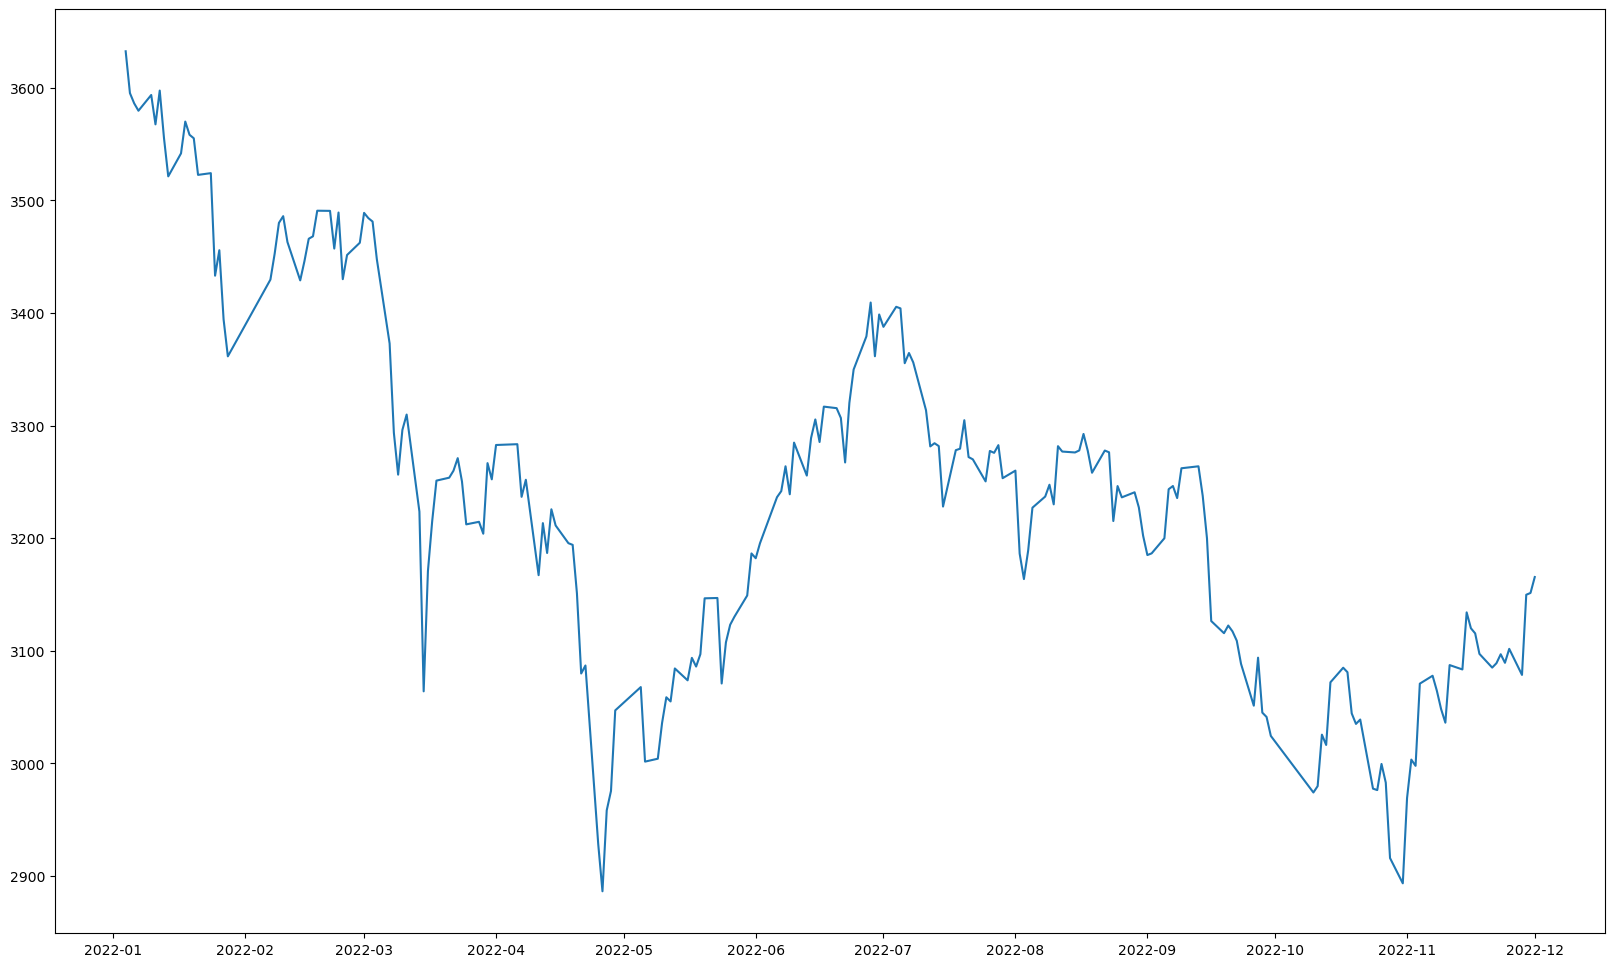

In [12]:
figure1 = plt.figure(figsize=(20, 12))
plt.plot(df['date'], df['close'], linestyle='-')

<Axes: >

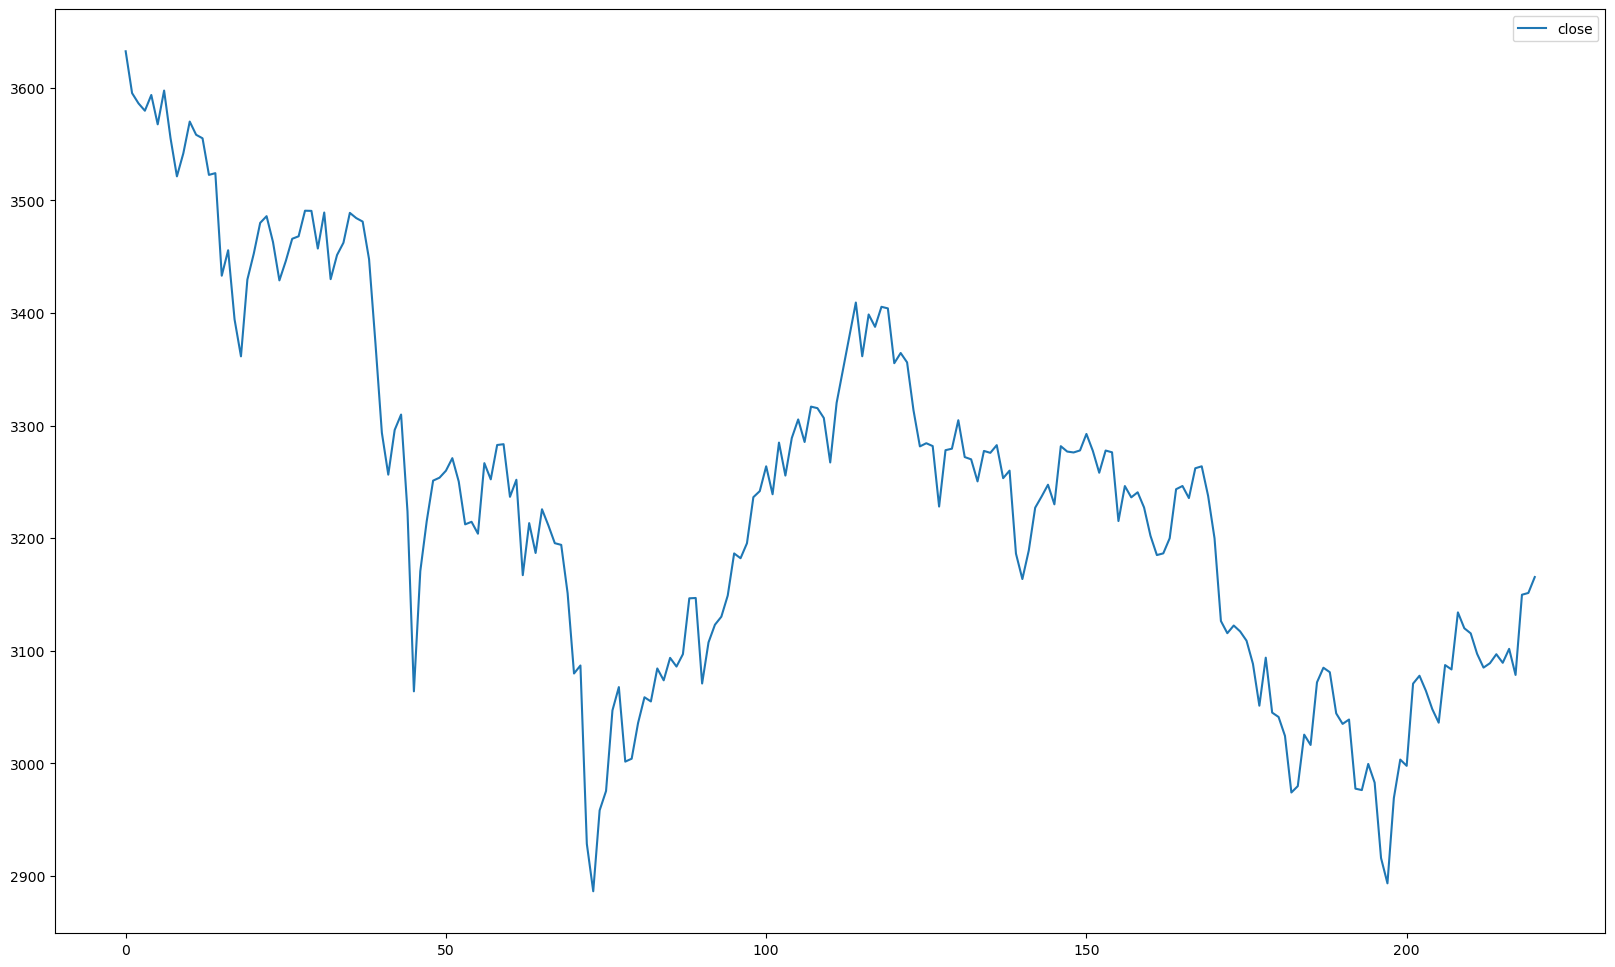

In [13]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=df)